# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

In [30]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [31]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip']/ (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```. 

In [32]:
reg = smf.ols('tip ~ sex + C(smoker) + C(time) + net_bill', data =tips).fit()

In [33]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           2.64e-20
Time:                        13:07:35   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1999      0.24

2. Remova as variáveis não significantes.

In [34]:
reg = smf.ols('tip ~ net_bill', data =tips).fit()

In [35]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           5.02e-23
Time:                        13:07:35   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

3. observe o gráfico de resíduos em função de net_bill

In [36]:
tips['res_tip'] = reg.resid

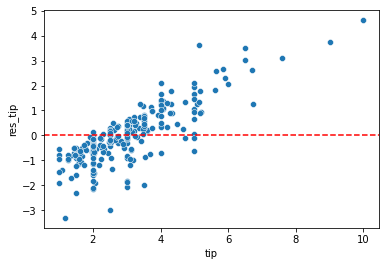

In [37]:
sns.scatterplot(x = 'tip', y = 'res_tip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

4. teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

*Conforme veremos abaixo, entre o modelo com o log versus o modelo com o polinômio, o segundo (polinômio) tem um melhor r-quadrado: 0.30 e o gráfico do resíduo começa a mostrar uma curva 'concava'.*

In [38]:
reg = smf.ols('tip ~ np.log(net_bill)', data =tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           4.40e-20
Time:                        13:07:35   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

In [39]:
tips['res_log_net_bill'] = reg.resid

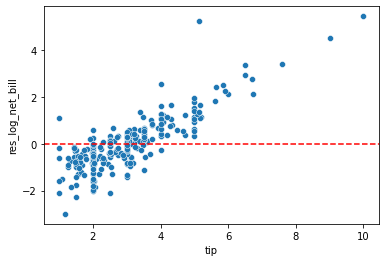

In [40]:
sns.scatterplot(x = 'tip', y = 'res_log_net_bill', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [41]:
reg = smf.ols('tip ~ np.power(net_bill,2)', data =tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.47e-20
Time:                        13:07:35   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.25

In [42]:
tips['res_poli_net_bill'] = reg.resid

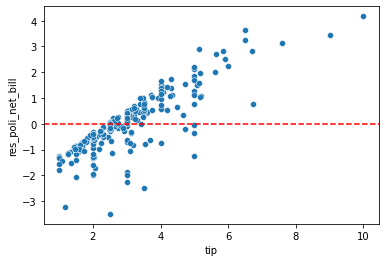

In [43]:
sns.scatterplot(x = 'tip', y = 'res_poli_net_bill', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.

In [44]:
reg = smf.ols('np.log(tip) ~ sex + C(smoker) + C(time) + net_bill', data =tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.21e-18
Time:                        13:07:36   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4504      0.07

2. Remova as variáveis não significantes.

In [45]:
reg = smf.ols('np.log(tip) ~ net_bill', data =tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           2.60e-21
Time:                        13:07:36   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

3. Observe o gráfico de resíduos em função de ```net_bill```

In [46]:
tips['res_net_bill'] = reg.resid

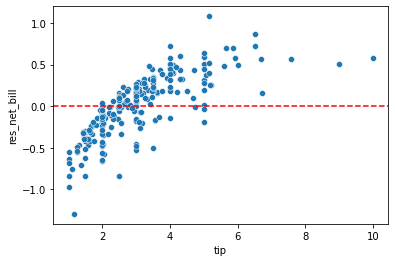

In [47]:
sns.scatterplot(x = 'tip', y = 'res_net_bill', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

4. Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

*Conforme visto nos estudos abaixo, quando usamos log de tip versus log de net_bill, temos um r-quadrado de 0,319. Maior do que o modelo usando o polinômio de net_bill. Os gráficos de resíduos mostram bem a evolução dos modelos, já vemos uma dispersão menos no modelo que usamos o log de tip e log de net_bill.*

In [48]:
reg = smf.ols('np.log(tip) ~ np.log(net_bill)', data =tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           5.62e-22
Time:                        13:07:36   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

In [49]:
tips['res_log_net_bill_por_log_tip'] = reg.resid

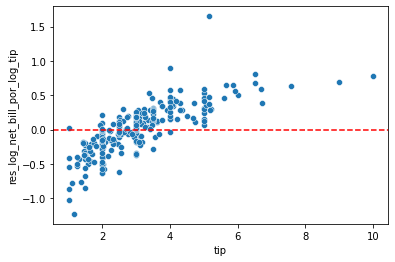

In [50]:
sns.scatterplot(x = 'tip', y = 'res_log_net_bill_por_log_tip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [51]:
reg = smf.ols('np.log(tip) ~ np.power(net_bill,2)', data =tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     80.67
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           7.70e-17
Time:                        13:07:36   Log-Likelihood:                -108.16
No. Observations:                 244   AIC:                             220.3
Df Residuals:                     242   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.78

In [52]:
tips['res_poli_net_bill_por_log_tip'] = reg.resid

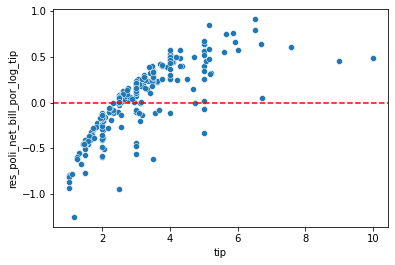

In [53]:
sns.scatterplot(x = 'tip', y = 'res_poli_net_bill_por_log_tip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

*Vemos que mesmo com os modelos de ajuste, o primeiro modelo criando, onde apenas vimos o tip versus o net_bill obteve um r-quadrado de 0.333, que é o melhor modelo que encontamos*

In [54]:
#Modelo 1
reg = smf.ols('tip ~ net_bill', data =tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           5.02e-23
Time:                        13:07:37   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

In [55]:
#Modelo 'final'
reg = smf.ols('np.log(tip) ~ np.log(net_bill)', data =tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           5.62e-22
Time:                        13:07:37   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|


In [56]:
previsao_de_renda = pd.read_csv('/content/previsao_de_renda (1).csv')

In [57]:
previsao_de_renda = pd.DataFrame(previsao_de_renda)

In [58]:
previsao_de_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [59]:
previsao_de_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

1. Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

In [60]:
reg = smf.ols('renda ~ tempo_emprego', data =previsao_de_renda).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:07:37   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

In [61]:
previsao_de_renda['res_tempo_emprego'] = reg.resid

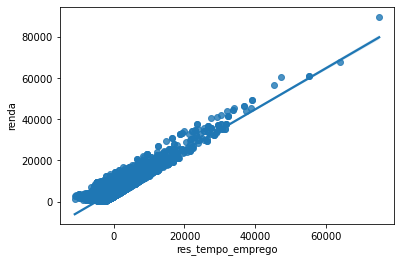

In [62]:
sns.regplot(y = 'renda', x = 'res_tempo_emprego', data = previsao_de_renda)

3. Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.

In [63]:
reg = smf.ols('renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + qtd_filhos + C(tipo_renda) +  C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia'
              , data =previsao_de_renda).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     146.9
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:07:38   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12441   BIC:                         2.442e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

In [70]:
reg = smf.ols('renda ~ C(sexo) + C(posse_de_imovel) + idade + tempo_emprego'
              , data =previsao_de_renda).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     813.7
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:09:47   Log-Likelihood:            -1.2210e+05
No. Observations:               12466   AIC:                         2.442e+05
Df Residuals:                   12461   BIC:                         2.442e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [71]:
previsao_de_renda['res_ajustado'] = reg.resid

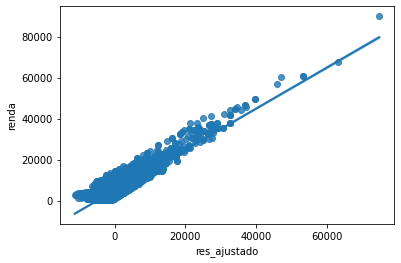

In [73]:
sns.regplot(y = 'renda', x = 'res_ajustado', data = previsao_de_renda)